## World Development Indicators: 3 Economic Indicators' impact on GDP Growth for BRIC Nations

### Hypothesis: The following economic indicators have been a significant contributor to the growth of GDP(%) in BRIC Nations (Brazil, Russia, India, and China). In other words, these indicators will have a strong positive R^2 or correlation with % GDP Growth (close to 1).

-  An increase in Population growth (annual %) // SP.POP.GROW
-  An increase in Exports of goods and services (annual % growth) // NE.EXP.GNFS.KD.ZG
-  An increase in Services, etc., value added (annual % growth) // NV.SRV.TETC.KD.ZG

__Note__: Includes time series between 1961-2015. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/lucaszarzeczny/Desktop/MicroDegree/Data_Visualization/world-development-indicators/indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
years = data['Year'].unique().tolist()
len(years)
print(min(years)," to ",max(years))

1960  to  2015


In [5]:
data.keys() # Titles of the data

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [6]:
print(data['CountryName'].unique().tolist())

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Euro area', 'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'High income: nonOECD', 'High income: OECD', 'Latin America & Caribbean (all income levels)', 'Latin America & Caribbean (developing only)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa (all income levels)', 'Middle East & North Africa (developing only)', 'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Small states', 'South Asia', 'Sub-Saharan Africa (all income levels)', 'Sub-Saharan Africa (developing only)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', '

In [7]:
russia = (data[data['CountryName'] == 'Russian Federation'])
russia.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18282,Russian Federation,RUS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,27.8518


In [8]:
india = (data[data['CountryName'] == 'India'])
india.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11561,India,IND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,103.938


In [9]:
brazil = (data[data['CountryName'] == 'Brazil'])
brazil.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5630,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,92.0468


In [10]:
china = (data[data['CountryName'] == 'China'])
china.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7144,China,CHN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,68.0332


# India Economic Indicators

In [25]:
# Russia: check number of years indicator is available for
# An increase in Population growth (annual %) // SP.POP.GROW
# An increase in Exports of goods and services (annual % growth) // NE.EXP.GNFS.KD.ZG
# An increase in Service, value added (annual % growth) // NV.IND.MANF.KD.ZG
india_indicator1 = 'NY.GDP.MKTP.KD.ZG' # GDP Growth % Annual
india_indicator2 = 'SP.POP.GROW'
india_indicator3 = 'NE.EXP.GNFS.KD.ZG'
india_indicator4 = 'NV.SRV.TETC.KD.ZG'
india_country = 'India'

india1 = data['IndicatorCode'].str.contains(india_indicator1) 
india2 = data['IndicatorCode'].str.contains(india_indicator2)
india3 = data['IndicatorCode'].str.contains(india_indicator3)
india4 = data['IndicatorCode'].str.contains(india_indicator4)
india5 = data['CountryName'].str.contains(india_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.
india_mask1 = data[india1 & india5]
india_mask2 = data[india2 & india5]
india_mask3 = data[india3 & india5]
india_mask4 = data[india4 & india5]

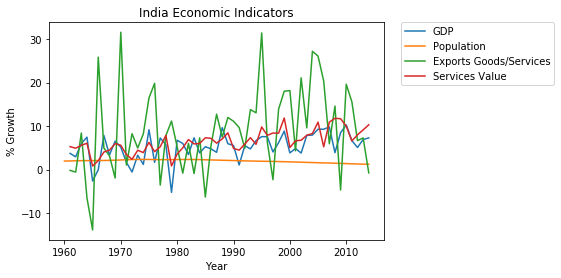

In [26]:
# India Data
# switch to a line plot
plt.plot(india_mask1['Year'].values, india_mask1['Value'].values)
plt.plot(india_mask2['Year'].values, india_mask2['Value'].values)
plt.plot(india_mask3['Year'].values, india_mask3['Value'].values)
plt.plot(india_mask4['Year'].values, india_mask4['Value'].values)

# Legend

plt.legend(['GDP', 'Population', 
           'Exports Goods/Services', 'Services Value'], prop={'size': 10}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Label the axes
plt.xlabel('Year')
plt.ylabel('% Growth')

#label the figure
plt.title('India Economic Indicators')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

In [28]:
print("India GDP Min Year = ", india_mask1['Year'].min(), "max: ", india_mask1['Year'].max())
print("India Population growth Min Year = ", india_mask2['Year'].min(), "max: ", india_mask2['Year'].max())
india_mask2_1 = india_mask2[india_mask2['Year'] > 1960]
print(len(india_mask2_1))
print(len(india_mask1))

India GDP Min Year =  1961 max:  2014
India Population growth Min Year =  1960 max:  2014
54
54


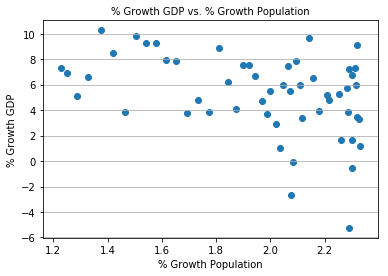

array([[ 1.       , -0.4135976],
       [-0.4135976,  1.       ]])

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Population',fontsize=10)
axis.set_xlabel('% Growth Population',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = india_mask2_1['Value']
Y = india_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(india_mask2_1['Value'],india_mask1['Value'])

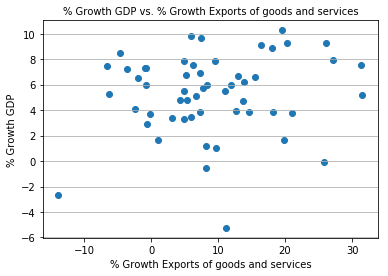

array([[1.        , 0.14501989],
       [0.14501989, 1.        ]])

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Exports of goods and services',fontsize=10)
axis.set_xlabel('% Growth Exports of goods and services',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = india_mask3['Value']
Y = india_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(india_mask3['Value'],india_mask1['Value'])

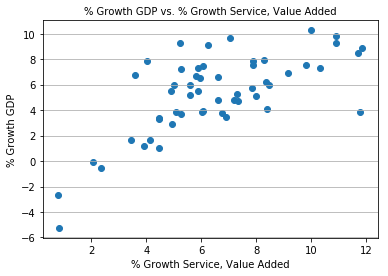

array([[1.        , 0.69051017],
       [0.69051017, 1.        ]])

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Service, Value Added',fontsize=10)
axis.set_xlabel('% Growth Service, Value Added',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = india_mask4['Value']
Y = india_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(india_mask4['Value'],india_mask1['Value'])

# China Economic Indicators

In [32]:
# China check number of years indicator is available for
# An increase in Population growth (annual %) // SP.POP.GROW
# An increase in Exports of goods and services (annual % growth) // NE.EXP.GNFS.KD.ZG
# An increase in Service, value added (annual % growth) // NV.IND.MANF.KD.ZG
china_indicator1 = 'NY.GDP.MKTP.KD.ZG' # GDP Growth % Annual
china_indicator2 = 'SP.POP.GROW'
china_indicator3 = 'NE.EXP.GNFS.KD.ZG'
china_indicator4 = 'NV.SRV.TETC.KD.ZG'
china_country = 'CHN'

china1 = data['IndicatorCode'].str.contains(china_indicator1) 
china2 = data['IndicatorCode'].str.contains(china_indicator2)
china3 = data['IndicatorCode'].str.contains(china_indicator3)
china4 = data['IndicatorCode'].str.contains(china_indicator4)
china5 = data['CountryCode'].str.contains(china_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.
china_mask1 = data[china1 & china5]
china_mask2 = data[china2 & china5]
china_mask3 = data[china3 & china5]
china_mask4 = data[china4 & china5]

Text(0.5, 1.0, 'China Economic Indicators')

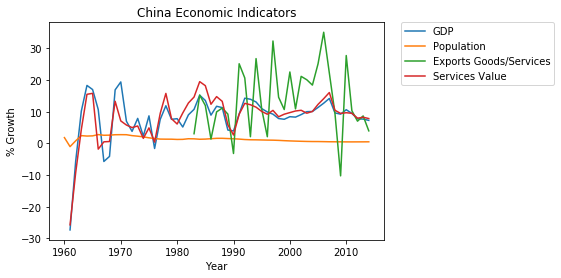

In [33]:
# China Data
# switch to a line plot
plt.plot(china_mask1['Year'].values, china_mask1['Value'].values)
plt.plot(china_mask2['Year'].values, china_mask2['Value'].values)
plt.plot(china_mask3['Year'].values, china_mask3['Value'].values)
plt.plot(china_mask4['Year'].values, china_mask4['Value'].values)

# Legend

plt.legend(['GDP', 'Population', 
           'Exports Goods/Services', 'Services Value'], prop={'size': 10}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Label the axes
plt.xlabel('Year')
plt.ylabel('% Growth')

#label the figure
plt.title('China Economic Indicators')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25]) 

In [34]:
print("China GDP Min Year = ", china_mask1['Year'].min(), "max: ", china_mask1['Year'].max())
print("China Population growth Min Year = ", china_mask2['Year'].min(), "max: ", china_mask2['Year'].max())
china_mask2_1 = china_mask2[china_mask2['Year'] > 1960]
print(len(china_mask2_1))
print(len(china_mask1))

China GDP Min Year =  1961 max:  2014
China Population growth Min Year =  1960 max:  2014
54
54


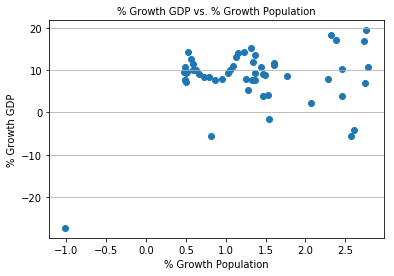

array([[1.        , 0.25873315],
       [0.25873315, 1.        ]])

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Population',fontsize=10)
axis.set_xlabel('% Growth Population',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = china_mask2_1['Value']
Y = china_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(china_mask2_1['Value'],china_mask1['Value'])

In [41]:
print("China GDP Min Year = ", china_mask1['Year'].min(), "max: ", china_mask1['Year'].max())
print("China Growth Exports of goods and services  = ", china_mask3['Year'].min(), "max: ", china_mask3['Year'].max())
china_mask3_1 = china_mask1[china_mask1['Year'] >= 1983]
print(len(china_mask3_1)) # GDP
print(len(china_mask3)) # Exports

China GDP Min Year =  1961 max:  2014
China Growth Exports of goods and services  =  1983 max:  2014
32
32


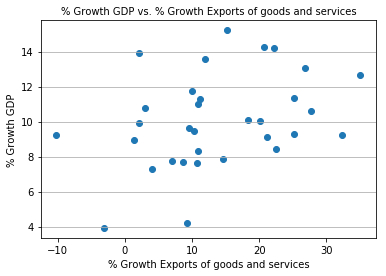

array([[1.        , 0.35197774],
       [0.35197774, 1.        ]])

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Exports of goods and services',fontsize=10)
axis.set_xlabel('% Growth Exports of goods and services',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = china_mask3['Value']
Y = china_mask3_1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(china_mask3['Value'],china_mask3_1['Value'])

In [45]:
print("China GDP Min Year = ", china_mask1['Year'].min(), "max: ", china_mask1['Year'].max())
print("China Growth Service, Value Added  = ", china_mask4['Year'].min(), "max: ", china_mask4['Year'].max())
#china_mask3_1 = china_mask1[china_mask1['Year'] >= 1983]
print(len(china_mask1)) # GDP
print(len(china_mask4)) # Exports

China GDP Min Year =  1961 max:  2014
China Growth Service, Value Added  =  1961 max:  2014
54
54


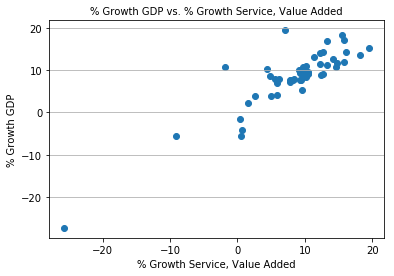

array([[1.        , 0.88063481],
       [0.88063481, 1.        ]])

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Service, Value Added',fontsize=10)
axis.set_xlabel('% Growth Service, Value Added',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = china_mask4['Value']
Y = china_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(china_mask4['Value'],china_mask1['Value'])

# Russian Federation Economic Indicators

In [47]:
# Russian Federation: check number of years indicator is available for
# An increase in Population growth (annual %) // SP.POP.GROW
# An increase in Exports of goods and services (annual % growth) // NE.EXP.GNFS.KD.ZG
# An increase in Manufacturing, value added (annual % growth) // NV.IND.MANF.KD.ZG
russia_indicator1 = 'NY.GDP.MKTP.KD.ZG' # GDP Growth % Annual
russia_indicator2 = 'SP.POP.GROW'
russia_indicator3 = 'NE.EXP.GNFS.KD.ZG'
russia_indicator4 = 'NV.SRV.TETC.KD.ZG'
russia_country = 'Russian Federation'

russia1 = data['IndicatorCode'].str.contains(russia_indicator1) 
russia2 = data['IndicatorCode'].str.contains(russia_indicator2)
russia3 = data['IndicatorCode'].str.contains(russia_indicator3)
russia4 = data['IndicatorCode'].str.contains(russia_indicator4)
russia5 = data['CountryName'].str.contains(russia_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.
russia_mask1 = data[russia1 & russia5]
russia_mask2 = data[russia2 & russia5]
russia_mask3 = data[russia3 & russia5]
russia_mask4 = data[russia4 & russia5]

Text(0.5, 1.0, 'Russia Economic Indicators')

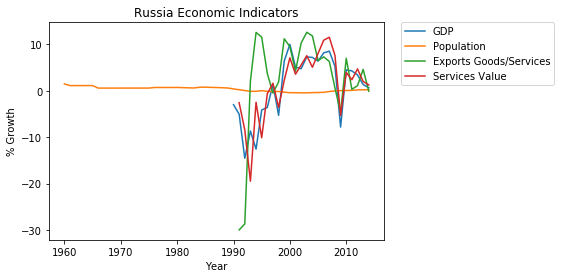

In [48]:
# Russian Federation Data
# switch to a line plot
plt.plot(russia_mask1['Year'].values, russia_mask1['Value'].values)
plt.plot(russia_mask2['Year'].values, russia_mask2['Value'].values)
plt.plot(russia_mask3['Year'].values, russia_mask3['Value'].values)
plt.plot(russia_mask4['Year'].values, russia_mask4['Value'].values)

# Legend

plt.legend(['GDP', 'Population', 
           'Exports Goods/Services', 'Services Value'], prop={'size': 10}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Label the axes
plt.xlabel('Year')
plt.ylabel('% Growth')

#label the figure
plt.title('Russia Economic Indicators')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25]) 

In [62]:
print("Russia GDP Min Year = ", russia_mask1['Year'].min(), "max: ", russia_mask1['Year'].max())
print("Russia Population growth Min Year = ", russia_mask2['Year'].min(), "max: ", russia_mask2['Year'].max())
russia_mask2_1 = russia_mask2[russia_mask2['Year'] > 1989]
print(len(russia_mask2_1)) # Pop Growth
print(len(russia_mask1))

print("Russia GDP Min Year = ", russia_mask1['Year'].min(), "max: ", russia_mask1['Year'].max())
print("Russia Growth Exports of goods and services = ", russia_mask3['Year'].min(), "max: ", russia_mask3['Year'].max())
russia_mask3_1 = russia_mask1[russia_mask1['Year'] > 1990]
print(len(russia_mask3_1))
print(len(russia_mask3)) # Growth Exports 

print("Russia GDP Min Year = ", russia_mask1['Year'].min(), "max: ", russia_mask1['Year'].max())
print("Russia Growth Service, Value Added = ", russia_mask4['Year'].min(), "max: ", russia_mask4['Year'].max())
russia_mask4_1 = russia_mask1[russia_mask1['Year'] > 1990]
print(len(russia_mask4_1)) # GDP
print(len(russia_mask4)) # Growth Serivce

Russia GDP Min Year =  1990 max:  2014
Russia Population growth Min Year =  1960 max:  2014
25
25
Russia GDP Min Year =  1990 max:  2014
Russia Growth Exports of goods and services =  1991 max:  2014
24
24
Russia GDP Min Year =  1990 max:  2014
Russia Growth Service, Value Added =  1991 max:  2014
24
24


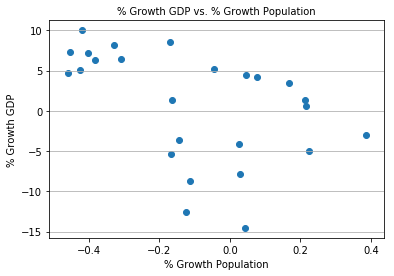

array([[ 1.        , -0.47533879],
       [-0.47533879,  1.        ]])

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Population',fontsize=10)
axis.set_xlabel('% Growth Population',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = russia_mask2_1['Value']
Y = russia_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(russia_mask2_1['Value'],russia_mask1['Value'])

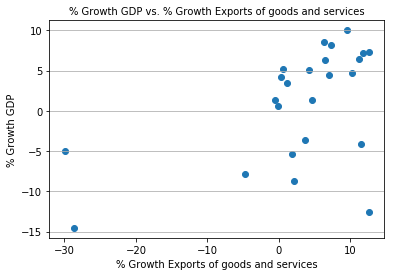

array([[1.        , 0.51958236],
       [0.51958236, 1.        ]])

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Exports of goods and services',fontsize=10)
axis.set_xlabel('% Growth Exports of goods and services',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = russia_mask3['Value']
Y = russia_mask3_1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(russia_mask3['Value'],russia_mask3_1['Value'])

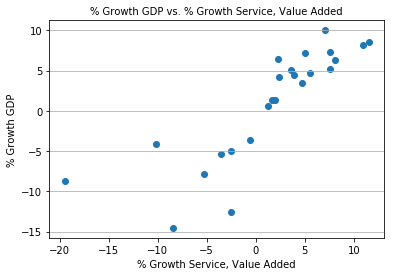

array([[1.        , 0.83604447],
       [0.83604447, 1.        ]])

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Service, Value Added',fontsize=10)
axis.set_xlabel('% Growth Service, Value Added',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = russia_mask4['Value']
Y = russia_mask4_1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(russia_mask4['Value'],russia_mask4_1['Value'])

# Brazil Economic Indicators

In [67]:
# Brazil: check number of years indicator is available for
# An increase in Population growth (annual %) // SP.POP.GROW
# An increase in Exports of goods and services (annual % growth) // NE.EXP.GNFS.KD.ZG
# An increase in Manufacturing, value added (annual % growth) // NV.IND.MANF.KD.ZG
brazil_indicator1 = 'NY.GDP.MKTP.KD.ZG' # GDP Growth % Annual
brazil_indicator2 = 'SP.POP.GROW'
brazil_indicator3 = 'NE.EXP.GNFS.KD.ZG'
brazil_indicator4 = 'NV.SRV.TETC.KD.ZG'
brazil_country = 'Brazil'

brazil1 = data['IndicatorCode'].str.contains(brazil_indicator1) 
brazil2 = data['IndicatorCode'].str.contains(brazil_indicator2)
brazil3 = data['IndicatorCode'].str.contains(brazil_indicator3)
brazil4 = data['IndicatorCode'].str.contains(brazil_indicator4)
brazil5 = data['CountryName'].str.contains(brazil_country)


# stage is just those indicators matching the USA for country code and CO2 emissions over time.
brazil_mask1 = data[brazil1 & brazil5]
brazil_mask2 = data[brazil2 & brazil5]
brazil_mask3 = data[brazil3 & brazil5]
brazil_mask4 = data[brazil4 & brazil5]

Text(0.5, 1.0, 'Brazil Economic Indicators')

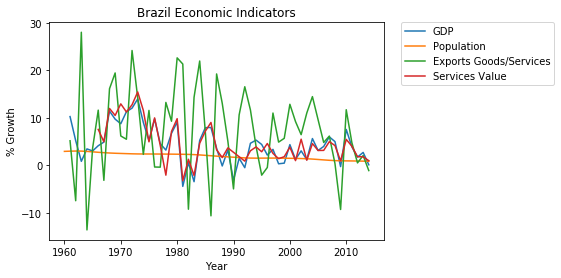

In [68]:
# Brazil Data
# switch to a line plot
plt.plot(brazil_mask1['Year'].values, brazil_mask1['Value'].values)
plt.plot(brazil_mask2['Year'].values, brazil_mask2['Value'].values)
plt.plot(brazil_mask3['Year'].values, brazil_mask3['Value'].values)
plt.plot(brazil_mask4['Year'].values, brazil_mask4['Value'].values)

# Legend

plt.legend(['GDP', 'Population', 
           'Exports Goods/Services', 'Services Value'], prop={'size': 10}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Label the axes
plt.xlabel('Year')
plt.ylabel('% Growth')

#label the figure
plt.title('Brazil Economic Indicators')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25]) 

In [78]:
print("Brazil GDP Min Year = ", brazil_mask1['Year'].min(), "max: ", brazil_mask1['Year'].max())
print("Brazil Population growth Min Year = ", brazil_mask2['Year'].min(), "max: ", brazil_mask2['Year'].max())
brazil_mask2_1 = brazil_mask2[brazil_mask2['Year'] > 1960]
print(len(brazil_mask2_1)) # Pop Growth
print(len(brazil_mask1)) # GDP Growth

print("Brazil GDP Min Year = ", brazil_mask1['Year'].min(), "max: ", brazil_mask1['Year'].max())
print("Brazil Growth Exports of goods and services = ", brazil_mask3['Year'].min(), "max: ", brazil_mask3['Year'].max())
print(len(brazil_mask1)) # GDP Growth
print(len(brazil_mask3)) # Growth Exports 

print("Brazil GDP Min Year = ", brazil_mask1['Year'].min(), "max: ", brazil_mask1['Year'].max())
print("Brazil Growth Service, Value Added = ", brazil_mask4['Year'].min(), "max: ", brazil_mask4['Year'].max())
brazil_mask4_1 = brazil_mask1[brazil_mask1['Year'] > 1967]
print(len(brazil_mask4_1)) # # GDP Growth
print(len(brazil_mask4)) # Growth Serivce



Brazil GDP Min Year =  1961 max:  2014
Brazil Population growth Min Year =  1960 max:  2014
54
54
Brazil GDP Min Year =  1961 max:  2014
Brazil Growth Exports of goods and services =  1961 max:  2014
54
54
Brazil GDP Min Year =  1961 max:  2014
Brazil Growth Service, Value Added =  1966 max:  2014
47
47


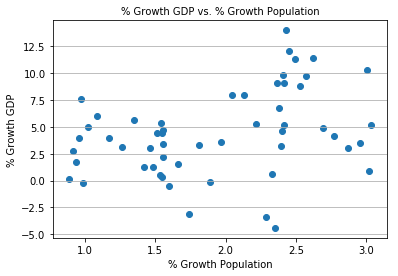

array([[1.        , 0.34467343],
       [0.34467343, 1.        ]])

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Population',fontsize=10)
axis.set_xlabel('% Growth Population',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = brazil_mask2_1['Value']
Y = brazil_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(brazil_mask2_1['Value'],brazil_mask1['Value'])

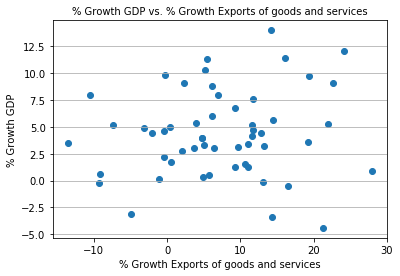

array([[1.        , 0.12069207],
       [0.12069207, 1.        ]])

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Exports of goods and services',fontsize=10)
axis.set_xlabel('% Growth Exports of goods and services',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = brazil_mask3['Value']
Y = brazil_mask1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(brazil_mask3['Value'],brazil_mask1['Value'])

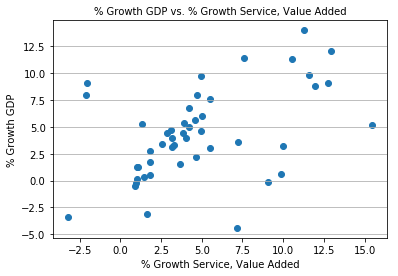

array([[1.       , 0.4715719],
       [0.4715719, 1.       ]])

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('% Growth GDP vs. % Growth Service, Value Added',fontsize=10)
axis.set_xlabel('% Growth Service, Value Added',fontsize=10)
axis.set_ylabel('% Growth GDP',fontsize=10)

X = brazil_mask4['Value']
Y = brazil_mask4_1['Value']

axis.scatter(X, Y)
plt.show()

np.corrcoef(brazil_mask4['Value'],brazil_mask4_1['Value'])

# Conclusions

### India Correlaton Strengths between Economic Indicators

**Hypothesis: The following economic indicators have been a significant contributor to the growth of GDP(%) in BRIC Nation India between 1961 and 2015.**

-  An increase in Population growth (annual %) 
 **With an RSI of -.41, this negates the hypothesis. In fact, an increase in population is has a slightly inverse effect on the growth of GDP.**
-  An increase in Exports of goods and services (annual % growth)
 **With an RSI of +.14, this negates the hypothesis. This economic indicator has a very weak correlation with GDP growth.**
-  An increase in Services, etc., value added (annual % growth)
 **With an RSI of +.69, this confirms the hypothesis. This has a strong RSI and confirms that the growth of Services has a direct postive effect on the growth of GDP.**

### China Correlaton Strengths between Economic Indicators

**Hypothesis: The following economic indicators have been a significant contributor to the growth of GDP(%) in BRIC Nation China between 1961 and 2015.**

-  An increase in Population growth (annual %) 
 **With an RSI of +.25, this neither confirms nor negates the hypothesis. This indicator has a weak positive correlation to the growth of GDP.
-  An increase in Exports of goods and services (annual % growth)
 **With an RSI of +.35, this slightly confirms the hypothesis. This economic indicator has a moderate positive correlation with GDP growth.**
-  An increase in Services, etc., value added (annual % growth)
 **With an RSI of +.88, this confirms the hypothesis. This has a strong RSI and confirms that the growth of Services has a direct postive effect on the growth of GDP.**

### Russian Federation Correlaton Strengths between Economic Indicators

**Hypothesis: The following economic indicators have been a significant contributor to the growth of GDP(%) in BRIC Nation Russia between 1990 and 2015.**

-  An increase in Population growth (annual %) 
 **With an RSI of -.47, this negates the hypothesis. In fact, an increase in population is has a slightly inverse effect on the growth of GDP.**
-  An increase in Exports of goods and services (annual % growth)
 **With an RSI of -.51, this negates the hypothesis. This economic indicator has a strong weak correlation with GDP growth - the inverse of the hypothesis.**
-  An increase in Services, etc., value added (annual % growth)
 **With an RSI of +.83, this confirms the hypothesis. This has a strong RSI and confirms that the growth of Services has a direct postive effect on the growth of GDP.**

### Brazil Correlaton Strengths between Economic Indicators

**Hypothesis: The following economic indicators have been a significant contributor to the growth of GDP(%) in BRIC Nation Brazil between 1961 and 2015.**

-  An increase in Population growth (annual %) 
 **With an RSI of .344, this slighly confirms the hypothesis. The growth of the population has had a minor and positive effect on the growth of GDP.
-  An increase in Exports of goods and services (annual % growth)
 **With an RSI of +.12, this negates the hypothesis. This economic indicator has a very weak correlation with GDP growth.**
-  An increase in Services, etc., value added (annual % growth)
 **With an RSI of +.47, this confirms the hypothesis. This has a moderate RSI and confirms that the growth of Services has a direct postive effect on the growth of GDP, but it is important to note this is down from correlations strengths in the +.80 range for Russia, India, and China.**

# Summary

## Overall Effect on BRIC Nations

**An increase in Population Growth, an increase in Exports of Goods and Services Growth, do not have an impact on the growth of GDP for BRIC Nations.**
**An increase in Services, Value Added Growth definitely has a strong and positive impact on the growth of GDP for BRIC Nations**